<a href="https://colab.research.google.com/github/mhasyimap/Tugas-Pemrograman-Python/blob/main/Tugas_minggu_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [2]:
ls

 3scene/   Coba   model_data/  'My Datasets'/   nmodel_scene/   Untitled0.ipynb


In [3]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Dense
from keras.layers.core import Flatten
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths 
import numpy as np
import os

In [4]:
print("[INFO] loading images...")
imagePaths = paths.list_images("My Datasets")
data = []
labels = []

[INFO] loading images...


In [5]:
for i in imagePaths:
  image = Image.open(i)
  image = np.array(image.resize((24,24))) / 255.0 #normalisasi
  data.append(image)

  label = i.split(os.path.sep)[-2]
  labels.append(label)

In [6]:
print(labels)

['forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest',

In [7]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [8]:
print(labels)

[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]


In [9]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data), np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(842, 24, 24, 3)
(281, 24, 24, 3)


In [10]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.core import Flatten

model = Sequential(
    [
        Flatten(input_shape=(24*24*3,)),
        Dense(100, activation="relu", name="layer1"),
        Dense(64, activation="relu", name="layer2"),
        Dense(64, activation="relu", name="layer3"),
        Dense(3, activation="softmax", name="layer4"),
    ]
)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1728)              0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               172900    
_________________________________________________________________
layer2 (Dense)               (None, 64)                6464      
_________________________________________________________________
layer3 (Dense)               (None, 64)                4160      
_________________________________________________________________
layer4 (Dense)               (None, 3)                 195       
Total params: 183,719
Trainable params: 183,719
Non-trainable params: 0
_________________________________________________________________


In [12]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

[INFO] training network...
Epoch 1/25
27/27 [==============================] - 0s 9ms/step - loss: 1.0370 - accuracy: 0.4097 - val_loss: 0.8753 - val_accuracy: 0.5765
Epoch 2/25
27/27 [==============================] - 0s 4ms/step - loss: 0.8152 - accuracy: 0.6461 - val_loss: 0.8287 - val_accuracy: 0.6655
Epoch 3/25
27/27 [==============================] - 0s 4ms/step - loss: 0.7514 - accuracy: 0.6948 - val_loss: 0.7429 - val_accuracy: 0.6940
Epoch 4/25
27/27 [==============================] - 0s 4ms/step - loss: 0.6118 - accuracy: 0.7720 - val_loss: 0.6381 - val_accuracy: 0.7722
Epoch 5/25
27/27 [==============================] - 0s 4ms/step - loss: 0.5881 - accuracy: 0.7720 - val_loss: 0.6557 - val_accuracy: 0.7082
Epoch 6/25
27/27 [==============================] - 0s 4ms/step - loss: 0.6426 - accuracy: 0.7185 - val_loss: 0.6984 - val_accuracy: 0.7438
Epoch 7/25
27/27 [==============================] - 0s 4ms/step - loss: 0.5471 - accuracy: 0.7993 - val_loss: 0.5620 - val_accuracy: 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


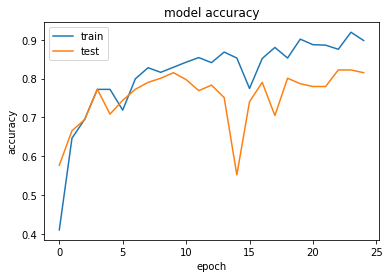

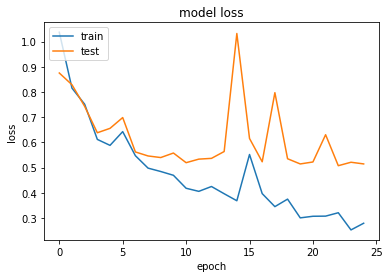

In [13]:
import matplotlib.pyplot as plt

print(H.history.keys())
#accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       coast       0.68      0.95      0.79        95
      forest       0.94      0.82      0.88        94
     highway       0.93      0.67      0.78        92

    accuracy                           0.81       281
   macro avg       0.85      0.81      0.82       281
weighted avg       0.85      0.81      0.82       281



In [15]:
model.save('model_data')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model_data/assets
